In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [3]:
import matplotlib.pyplot as plt

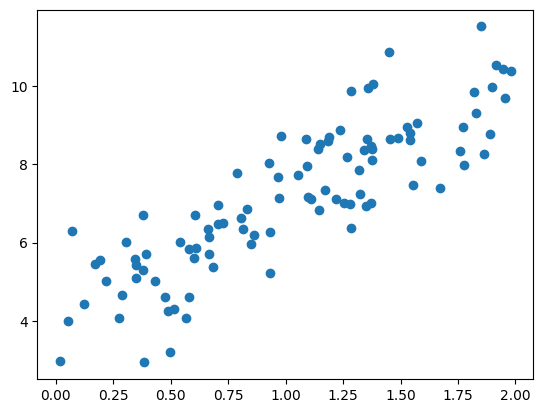

In [4]:
plt.scatter(x=X, y=y)

In [5]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.06663169],
       [3.01668883]])

(0.0, 2.0, 0.0, 15.0)

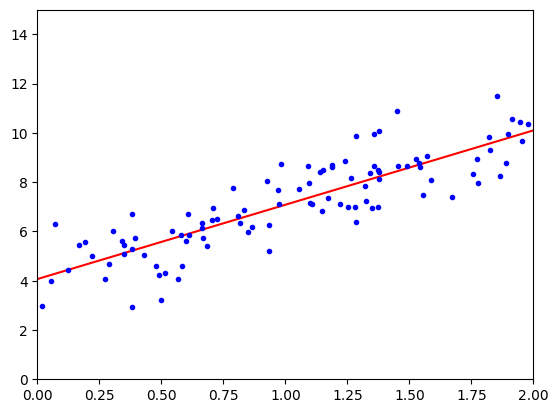

In [7]:
# Now make predictions with the theta_best
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2,0,15])

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.06663169]), array([[3.01668883]]))

In [9]:
lin_reg.predict(X_new)

array([[ 4.06663169],
       [10.10000935]])

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [11]:
theta_best_svd

array([[4.06663169],
       [3.01668883]])

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[4.06663169],
       [3.01668883]])

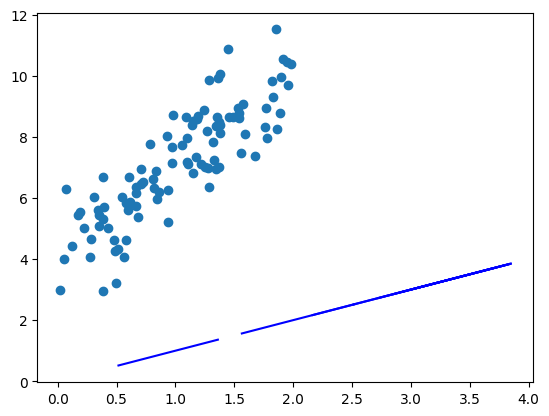

In [13]:
eta = 0.1
n_iterations = 10
m = 100

theta = np.random.randn(2, 1)

fig = plt.subplot()
fig.scatter(x=X, y=y)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    fig.plot(theta, theta, 'b-')

In [14]:
theta

array([[3.07545007],
       [3.83770364]])

In [15]:
n_epochs = 50

t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [16]:
theta

array([[4.08747661],
       [2.97533779]])

In [17]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.00184315]), array([3.09509116]))

In [61]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X **2 + X + 2 + np.random.randn(m, 1)

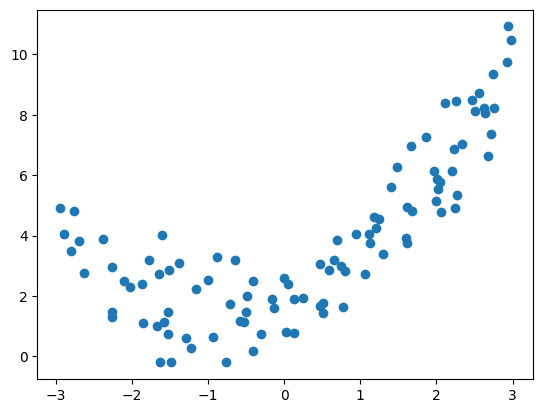

In [62]:
plt.scatter(X, y)

In [63]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)
X_poly[0]

array([0.01942792, 0.00037744])

In [64]:
X[0]

array([0.01942792])

In [65]:
from sklearn.linear_model import LinearRegression

ling_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[0.94172389, 0.58663565]]), array([1.81153026]))

In [66]:
y_test = lin_reg.predict(X_poly)

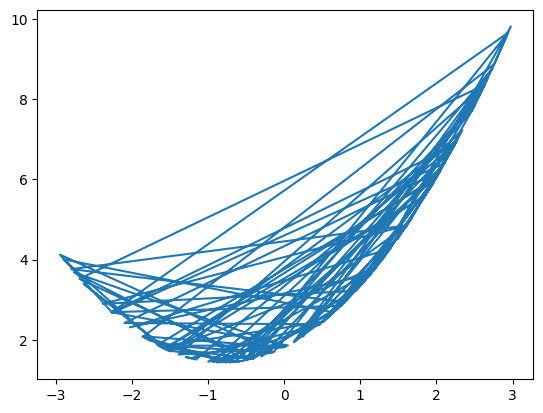

In [89]:
plt.plot(X, y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        